In [1]:
import qiskit
import numpy as np

In [9]:
""" 
    Qiskit
    https://qiskit.org/documentation/getting_started.html
"""
from qiskit import(
  QuantumCircuit,
  execute,
  Aer)
from qiskit.visualization import plot_histogram, plot_bloch_multivector


Result are: {'001': 124, '011': 132, '101': 124, '100': 120, '010': 141, '110': 124, '000': 134, '111': 125}


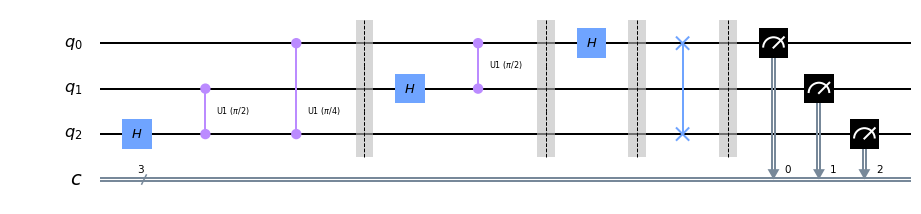

In [17]:
"""
    Quantum Fourier Transform (QFT)
    https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html
"""
# The discrete Fourier transform:
#  會依照 yk = 1/√N Σ(j:0 to N-1) xj e^(2 π i jk / N)
#  將 input vector (x0, …, xN-1) map 到 vector (y0, …, yN-1) 
# The quantum Fourier transform: 
#  會依照同上公式將 quantum state  Σxi|i> map 到 quantum state Σyi|i> 

# 1 個 qubit 等同 H gate
# 2 個 qubit 需要 CROT (controlled rotation) Gate
#  [[1, 0, 0, 0], 
#   [0, 1, 0, 0], 
#   [0, 0, 1, 0], 
#   [0, 0, 0, exp(2 π i / 2^k)]] 

simulator = Aer.get_backend('qasm_simulator')

# 以 3  qubit 為例
circuit = QuantumCircuit(3, 3)

# 順序從 most significant bit 開始
# qubit 2 (第三個)
circuit.h(2) 
circuit.cu1(np.pi / 2, 1, 2) # cu1 (角度, from qubit 1, to qubit 2)
# Qiskit 的 cu1(θ) 如下，與目標 CROT 有角度上的差異:
#  [[1, 0, 0, 0], 
#   [0, 1, 0, 0], 
#   [0, 0, 1, 0], 
#   [0, 0, 0, exp(iθ)]] 
circuit.cu1(np.pi / 4, 0, 2)
circuit.barrier()

# qubit 1 (第二個)
circuit.h(1)
circuit.cu1(np.pi / 2, 0, 1)
circuit.barrier()

# qubit 0 (第一個)
circuit.h(0)
circuit.barrier()

# swap 回正確順序
circuit.swap(0, 2)
circuit.barrier()

circuit.measure([0, 1, 2], [0, 1, 2])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(circuit)
print("Result are:",counts)

# Draw the circuit
circuit.draw(output='mpl')
# 順序 q1(y) q0(x) ..

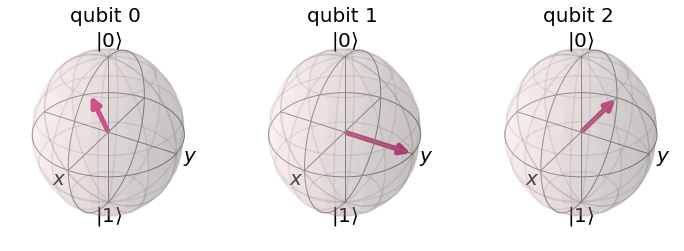

In [14]:
"""
    test QFT
    state = 5
"""
simulator = Aer.get_backend('statevector_simulator')

# 以 3  qubit 為例
circuit = QuantumCircuit(3, 3)

# encoded 5 = 101
circuit.x([0, 2])
circuit.barrier()

# 順序從 most significant bit 開始
# qubit 2 (第三個)
circuit.h(2) 
circuit.cu1(np.pi / 2, 1, 2) # cu1 (角度, from qubit 1, to qubit 2)
circuit.cu1(np.pi / 4, 0, 2)
circuit.barrier()

# qubit 1 (第二個)
circuit.h(1)
circuit.cu1(np.pi / 2, 0, 1)
circuit.barrier()

# qubit 0 (第一個)
circuit.h(0)
circuit.barrier()

# swap 回正確順序
circuit.swap(0, 2)
circuit.barrier()

#circuit.measure([0, 1, 2], [0, 1, 2])

# Execute the circuit on the qasm simulator
job = execute(circuit, simulator)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_statevector()
#print("Result are:",counts)
plot_bloch_multivector(counts)

# 1~8, state 5
# 5/8, 10/8 (=1/4), 20/8 (=1/2)